# Exploration of M5 Buoy Data

Data sourced from https://data.gov.ie/dataset/hourly-data-for-buoy-m5/resource/82c4a043-aa9f-4e8b-acad-bd1d7279dde5.

This data contains various buoy data from the M5 buoy, based off the west coast of the UK. There is some large periods of missing data, for one or many variables.

## Meta Data

- **Station Name:** M5
- **Station Height:** 0 M
- **Latitude:** 51.690
- **Longitude:** -6.700

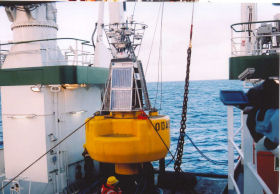

### Variable Descriptions

- **date:** Date and Time (utc)
- **temp:** Air Temperature (C)	
- **rhum:** Relative Humidity (%)
- **windsp:** Mean Wind Speed (kt)
- **dir:** Mean Wind Direction (degrees)
- **gust:** Maximum Gust (kt)
- **msl:** Mean Sea Level Pressure (hPa)
- **seatp:** Sea Temperature (C)
- **per:** Significant Wave Period (seconds)
- **wavht:** Significant Wave Height (m)
- **mxwav:** Individual Maximum Wave Height (m)
- **wvdir:** Wave Direction (degrees)

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading Data

In [34]:
df = pd.read_csv('M5data.csv', low_memory = False, index_col = 'date')

#Set date column to be index
df.index = pd.to_datetime(df.index, format='%d-%b-%Y %H:%M')

df = df.apply(pd.to_numeric, errors='coerce')

df.head(10)

,temp,rhum,wdsp,dir,gust,msl,seatp,per,wavht,mxwave,wvdir
date,,,,,,,,,,,
2004-10-18 10:00:00,10.9,69.0,9.0,270.0,12.0,1010.0,13.7,4.0,0.9,NaN,NaN
2004-10-18 11:00:00,11.1,67.0,9.0,260.0,12.0,1009.8,13.7,5.0,0.9,NaN,NaN
2004-10-18 12:00:00,11.1,69.0,8.0,250.0,12.0,1009.6,13.7,5.0,0.7,NaN,NaN
2004-10-18 13:00:00,11.1,64.0,8.0,260.0,12.0,1009.0,13.7,5.0,0.7,NaN,NaN
2004-10-18 14:00:00,11.2,65.0,8.0,240.0,12.0,1008.4,13.7,5.0,0.7,NaN,NaN
2004-10-18 15:00:00,11.3,61.0,8.0,240.0,12.0,1007.8,13.7,4.0,0.7,NaN,NaN
2004-10-18 17:00:00,11.3,63.0,14.0,230.0,17.0,1006.4,13.7,4.0,0.7,NaN,NaN
2004-10-18 18:00:00,11.4,63.0,13.0,220.0,17.0,1005.8,13.7,4.0,0.8,NaN,NaN
2004-10-18 19:00:00,11.5,66.0,13.0,210.0,17.0,1005.4,13.7,4.0,0.8,NaN,NaN


## Exploratory Plots

### Significant Wave Height

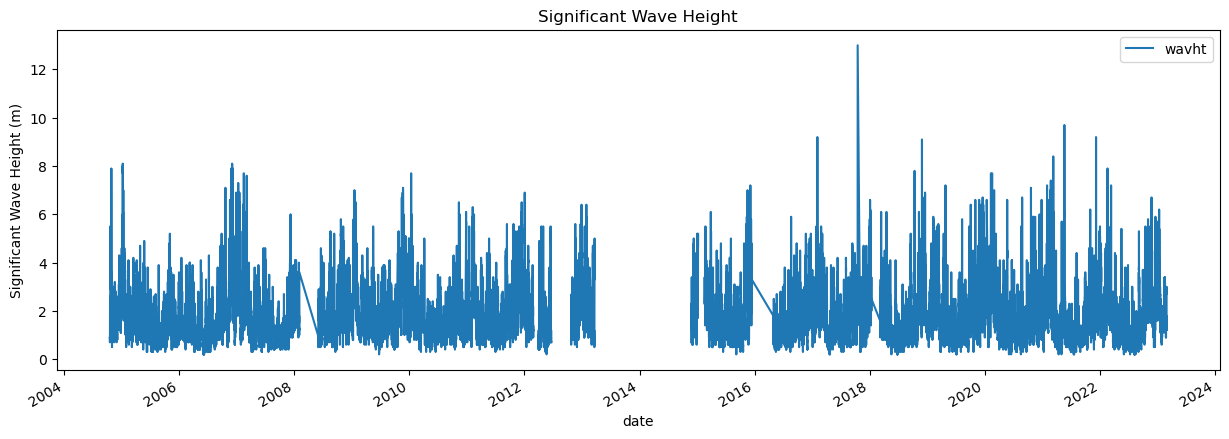

In [31]:
df.plot(y = 'wavht',
        figsize = (15, 5),
        title = 'Significant Wave Height',
        ylabel = 'Significant Wave Height (m)')
plt.show()

### Air and Water Temperature

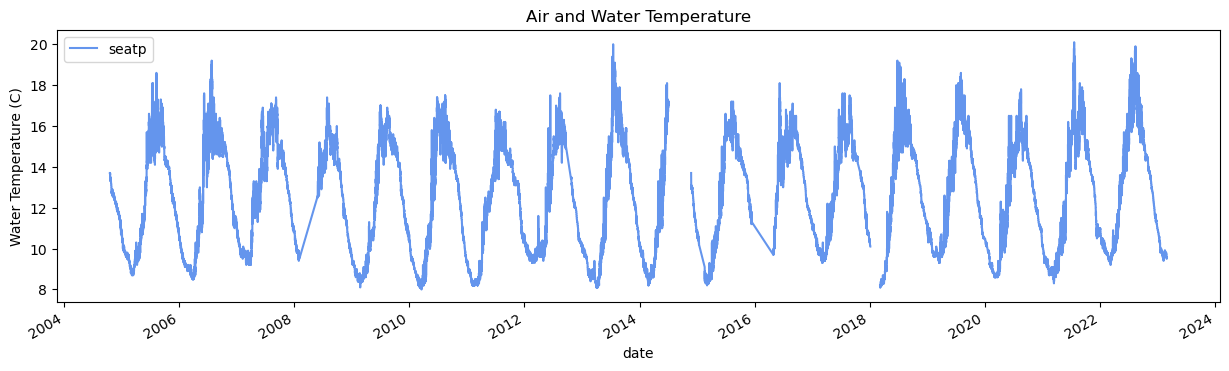

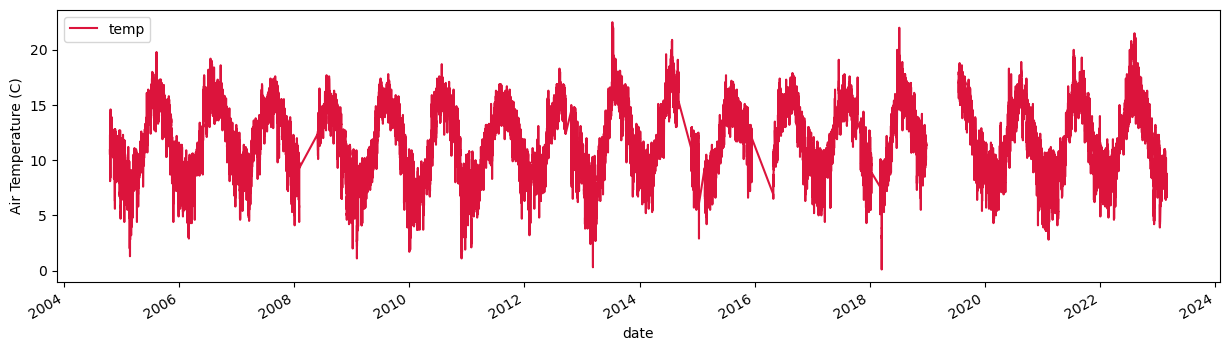

In [65]:
df.plot(y = 'seatp', figsize = (15,4), title = 'Air and Water Temperature',
        ylabel = 'Water Temperature (C)', color = 'cornflowerblue')
plt.show()

df.plot(y = 'temp', figsize = (15,4),
        ylabel = 'Air Temperature (C)', color = 'crimson')
plt.show()

### Significant Wave Period

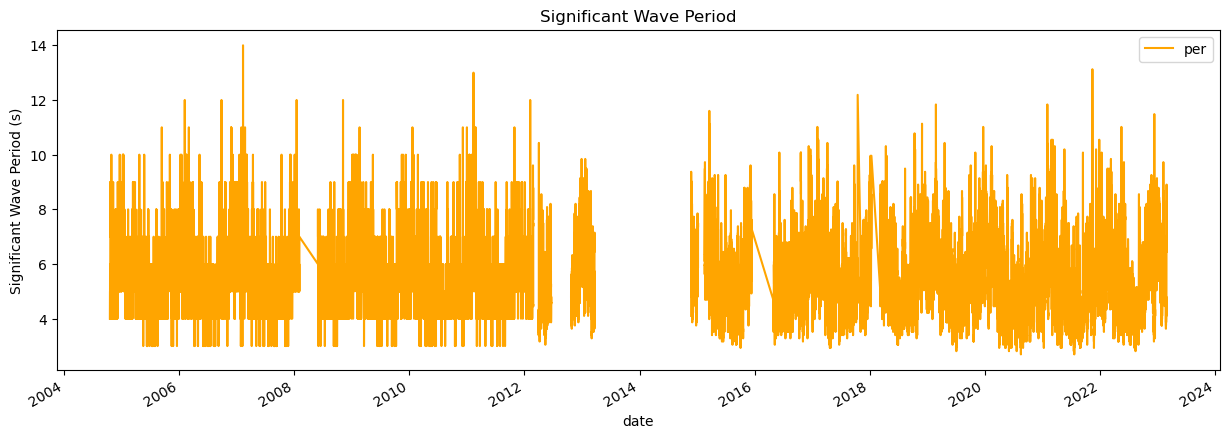

In [55]:
df.plot(y = 'per', figsize = (15, 5), title = 'Significant Wave Period',
        ylabel = 'Significant Wave Period (s)', color = 'orange')
plt.show()

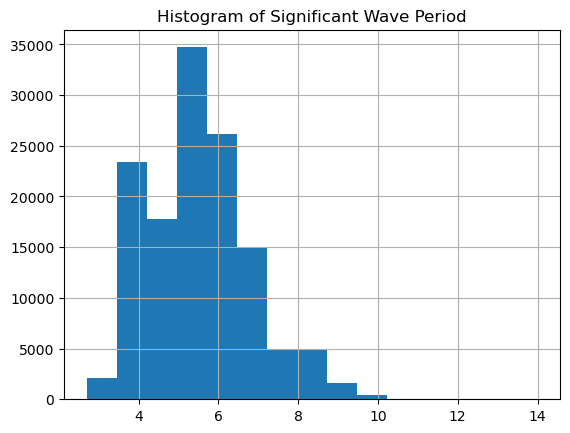

In [68]:
df[['per']].hist(bins=15)

plt.title('Histogram of Significant Wave Period')
plt.show()

### Wave and Wind Direction

In [58]:
df2 = df[['wvdir', 'dir']]
df2 = df2[ ~ df2.isnull().any(axis=1)]

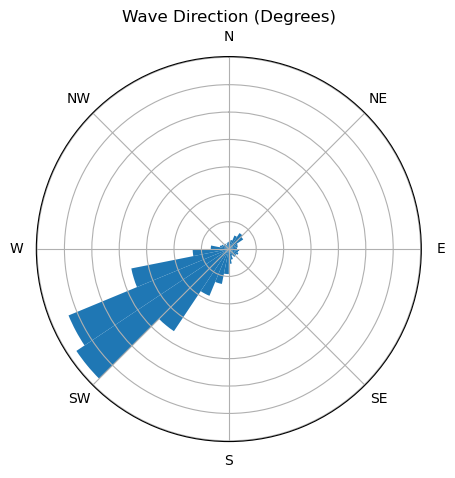

In [62]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'},
                       figsize = (5, 5))
ax.hist(df2['wvdir'].values*np.pi/180, bins = np.linspace(0, 2*np.pi, 33)) #32 bins

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_xticks(np.linspace(0, 2*np.pi, 8, endpoint=False))
ax.set_yticklabels([])
ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])
ax.set_title('Wave Direction (Degrees)')

plt.show()

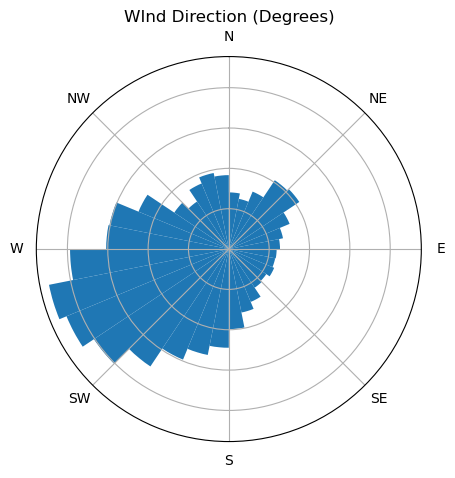

In [61]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'},
                       figsize = (5, 5))
ax.hist(df2['dir'].values*np.pi/180, bins = np.linspace(0, 2*np.pi, 33)) #32 bins

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_xticks(np.linspace(0, 2*np.pi, 8, endpoint=False))
ax.set_yticklabels([])
ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])
ax.set_title('WInd Direction (Degrees)')

plt.show()